In [95]:
import numpy as np
import scipy as sp


In [96]:
sp.__version__ #查看属性 版本号

'1.6.1'

In [97]:
np.__version__

'1.20.1'

In [98]:
from scipy.fftpack import fft2,ifft2 #2是2维数据 inversef反转


In [99]:
import matplotlib.pyplot as plt
%matplotlib inline 
#可以直接在console中显示图像

In [100]:
moon.shape


(437, 576, 3)

In [101]:
moon

array([[[199, 199, 199],
        [157, 157, 157],
        [  2,   2,   2],
        ...,
        [136, 136, 136],
        [  6,   6,   6],
        [ 33,  33,  33]],

       [[120, 120, 120],
        [114, 114, 114],
        [ 58,  58,  58],
        ...,
        [ 84,  84,  84],
        [ 47,  47,  47],
        [152, 152, 152]],

       [[ 35,  35,  35],
        [ 39,  39,  39],
        [ 48,  48,  48],
        ...,
        [ 18,  18,  18],
        [ 37,  37,  37],
        [158, 158, 158]],

       ...,

       [[175, 175, 175],
        [140, 140, 140],
        [ 39,  39,  39],
        ...,
        [163, 163, 163],
        [ 41,  41,  41],
        [105, 105, 105]],

       [[126, 126, 126],
        [111, 111, 111],
        [ 17,  17,  17],
        ...,
        [112, 112, 112],
        [ 15,  15,  15],
        [ 29,  29,  29]],

       [[ 66,  66,  66],
        [106, 106, 106],
        [162, 162, 162],
        ...,
        [ 59,  59,  59],
        [106, 106, 106],
        [199, 199, 199]]

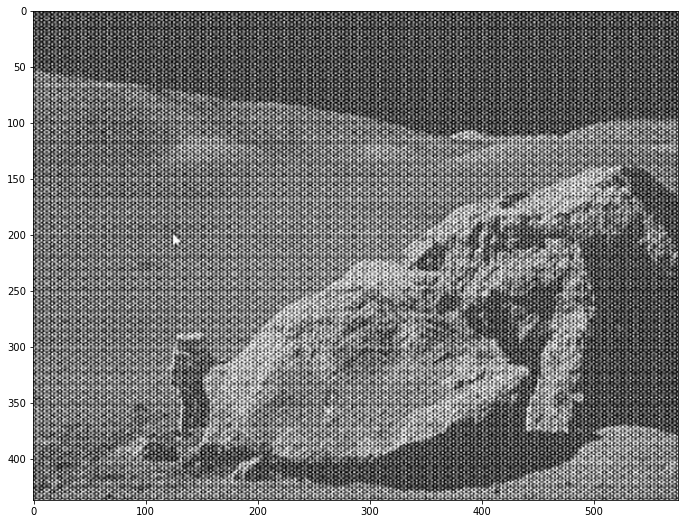

In [102]:
moon = plt.imread('./images/模糊图_fft傅里叶.jpg')
plt.figure(figsize=(12,9))
plt.imshow(moon,cmap=plt.cm.gray) #显示图片  设置尺寸 

In [103]:
moon_fft = fft2(moon) #转换成频域,看波动情况
moon_fft #有正,父,虚数-0.j

array([[[ 1.14258000e+05   -0.j        ,  0.00000000e+00   +0.j        ,
          0.00000000e+00   -0.j        ],
        [ 6.03786800e+02-1331.94002716j,  0.00000000e+00   +0.j        ,
          0.00000000e+00   -0.j        ],
        [ 4.13679891e+02 -607.26474545j,  0.00000000e+00   +0.j        ,
          0.00000000e+00   -0.j        ],
        ...,
        [ 2.93041379e+02 +656.12894401j,  0.00000000e+00   +0.j        ,
          0.00000000e+00   -0.j        ],
        [ 4.13679891e+02 +607.26474545j,  0.00000000e+00   +0.j        ,
          0.00000000e+00   -0.j        ],
        [ 6.03786800e+02+1331.94002716j,  0.00000000e+00   +0.j        ,
          0.00000000e+00   -0.j        ]],

       [[ 1.58289000e+05   -0.j        ,  0.00000000e+00   +0.j        ,
          0.00000000e+00   -0.j        ],
        [ 1.22117886e+02-1493.41761904j,  0.00000000e+00   +0.j        ,
          0.00000000e+00   -0.j        ],
        [-1.25928161e+01 -712.74579817j,  0.00000000e+00   +0.j  

In [104]:
#所有数据波动的平值
np.abs(moon_fft).mean() #abs去掉虚数,负变正

715.1112239782002

In [105]:
#大于10b倍的属于波动情况比较大,我们需要过滤掉
#就是 7000
cond = np.abs(moon_fft) >7000
cond

array([[[ True, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[ True, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[ True, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[ True, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[ True, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

In [106]:
#过滤,重新赋值为常量0
moon_fft[cond] = 0
moon_fft

array([[[    0.           +0.j        ,     0.           +0.j        ,
             0.           -0.j        ],
        [  603.78679965-1331.94002716j,     0.           +0.j        ,
             0.           -0.j        ],
        [  413.67989053 -607.26474545j,     0.           +0.j        ,
             0.           -0.j        ],
        ...,
        [  293.04137917 +656.12894401j,     0.           +0.j        ,
             0.           -0.j        ],
        [  413.67989053 +607.26474545j,     0.           +0.j        ,
             0.           -0.j        ],
        [  603.78679965+1331.94002716j,     0.           +0.j        ,
             0.           -0.j        ]],

       [[    0.           +0.j        ,     0.           +0.j        ,
             0.           -0.j        ],
        [  122.11788627-1493.41761904j,     0.           +0.j        ,
             0.           -0.j        ],
        [  -12.59281613 -712.74579817j,     0.           +0.j        ,
             0.   

In [107]:
#将频域,转换为时域
moon_result = ifft2(moon_fft)
moon_result

array([[[ 65.51219532+3.28954970e-17j,  65.51219532+3.28954970e-17j,
          65.51219532+3.28954970e-17j],
        [ 71.99683613-4.30931011e-15j,  71.99683613-4.30931011e-15j,
          71.99683613-4.30931011e-15j],
        [-24.1336269 -1.21713339e-15j, -24.1336269 -1.21713339e-15j,
         -24.1336269 -1.21713339e-15j],
        ...,
        [ 20.31974163+3.96150535e-16j,  20.31974163+3.96150535e-16j,
          20.31974163+3.96150535e-16j],
        [  7.35980873-4.25389282e-15j,   7.35980873-4.25389282e-15j,
           7.35980873-4.25389282e-15j],
        [  2.83332705-9.76670433e-16j,   2.83332705-9.76670433e-16j,
           2.83332705-9.76670433e-16j]],

       [[ -3.80293772-4.93432455e-17j,  -3.80293772-4.93432455e-17j,
          -3.80293772-4.93432455e-17j],
        [ 60.38975204-7.40148683e-16j,  60.38975204-7.40148683e-16j,
          60.38975204-7.40148683e-16j],
        [ -4.99922725-9.53969414e-16j,  -4.99922725-9.53969414e-16j,
          -4.99922725-9.53969414e-16j],
    

In [108]:
#去虚数
moon2 = np.real(moon_result)
moon2

array([[[ 65.51219532,  65.51219532,  65.51219532],
        [ 71.99683613,  71.99683613,  71.99683613],
        [-24.1336269 , -24.1336269 , -24.1336269 ],
        ...,
        [ 20.31974163,  20.31974163,  20.31974163],
        [  7.35980873,   7.35980873,   7.35980873],
        [  2.83332705,   2.83332705,   2.83332705]],

       [[ -3.80293772,  -3.80293772,  -3.80293772],
        [ 60.38975204,  60.38975204,  60.38975204],
        [ -4.99922725,  -4.99922725,  -4.99922725],
        ...,
        [-33.68624616, -33.68624616, -33.68624616],
        [-25.02274101, -25.02274101, -25.02274101],
        [ 55.07197246,  55.07197246,  55.07197246]],

       [[-38.56172002, -38.56172002, -38.56172002],
        [ 21.38416235,  21.38416235,  21.38416235],
        [ -6.92300249,  -6.92300249,  -6.92300249],
        ...,
        [-56.56075526, -56.56075526, -56.56075526],
        [-39.51031796, -39.51031796, -39.51031796],
        [ 67.72503778,  67.72503778,  67.72503778]],

       ...,

      

In [109]:
moon2.shape


(437, 576, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


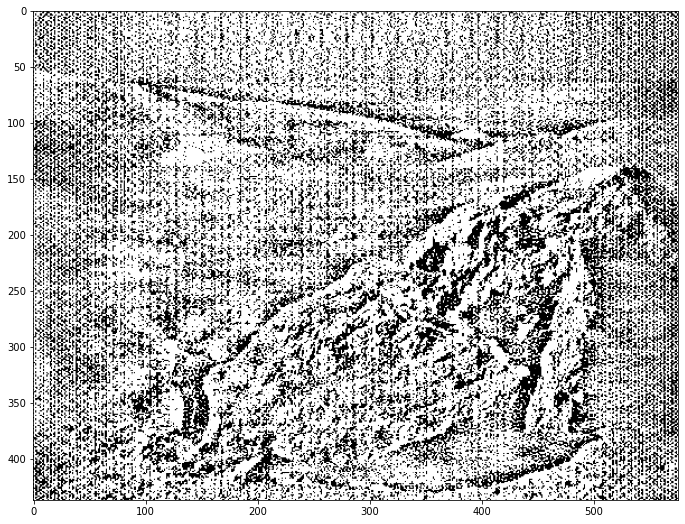

In [110]:
plt.figure(figsize=(12,9))
plt.imshow(moon2+10,cmap=plt.cm.gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


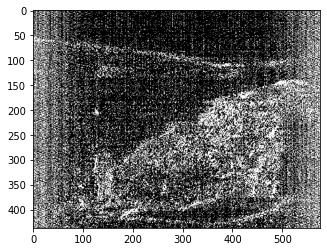

In [111]:
moon3= np.abs(moon2)
plt.imshow(moon3-20,cmap=plt.cm.gray)

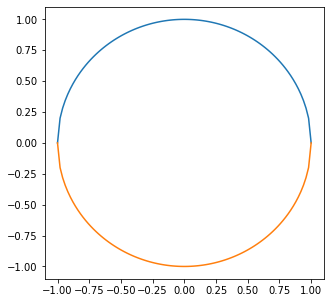

In [112]:
#积分操作
#cricle
# X**2 + Y**2 = 1
# Y=(1-x**2)**0.5
c = lambda x:(1-x**2)**0.5
x = np.linspace(-1,1,100) #等差数列
y = c(x)
plt.figure(figsize=(5,5))
plt.plot(x,y) #上
plt.plot(x,-y) #下

In [113]:
#圆周率  s = pi * r **2
# pi = s/(r**2)
# pi = s 面积
#求一个半圆的面积,
from scipy import integrate

In [114]:
ret = integrate.quad(c,-1,1) #定积分

In [115]:
1.5707963267948983*2

3.1415926535897967

In [116]:
ret

(1.5707963267948983, 1.0002354500215915e-09)

In [117]:
ret*2

(1.5707963267948983,
 1.0002354500215915e-09,
 1.5707963267948983,
 1.0002354500215915e-09)

In [118]:
from scipy import io

In [119]:
moon2

array([[[ 65.51219532,  65.51219532,  65.51219532],
        [ 71.99683613,  71.99683613,  71.99683613],
        [-24.1336269 , -24.1336269 , -24.1336269 ],
        ...,
        [ 20.31974163,  20.31974163,  20.31974163],
        [  7.35980873,   7.35980873,   7.35980873],
        [  2.83332705,   2.83332705,   2.83332705]],

       [[ -3.80293772,  -3.80293772,  -3.80293772],
        [ 60.38975204,  60.38975204,  60.38975204],
        [ -4.99922725,  -4.99922725,  -4.99922725],
        ...,
        [-33.68624616, -33.68624616, -33.68624616],
        [-25.02274101, -25.02274101, -25.02274101],
        [ 55.07197246,  55.07197246,  55.07197246]],

       [[-38.56172002, -38.56172002, -38.56172002],
        [ 21.38416235,  21.38416235,  21.38416235],
        [ -6.92300249,  -6.92300249,  -6.92300249],
        ...,
        [-56.56075526, -56.56075526, -56.56075526],
        [-39.51031796, -39.51031796, -39.51031796],
        [ 67.72503778,  67.72503778,  67.72503778]],

       ...,

      

In [120]:
#scipy操作以及,misic操作图片
io.savemat('moon.mat',mdict={'moon':moon2})

In [121]:
io.loadmat('./moon.mat')  #读取mat文件



{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Mar 15 19:31:51 2021',
 '__version__': '1.0',
 '__globals__': [],
 'moon': array([[[ 65.51219532,  65.51219532,  65.51219532],
         [ 71.99683613,  71.99683613,  71.99683613],
         [-24.1336269 , -24.1336269 , -24.1336269 ],
         ...,
         [ 20.31974163,  20.31974163,  20.31974163],
         [  7.35980873,   7.35980873,   7.35980873],
         [  2.83332705,   2.83332705,   2.83332705]],
 
        [[ -3.80293772,  -3.80293772,  -3.80293772],
         [ 60.38975204,  60.38975204,  60.38975204],
         [ -4.99922725,  -4.99922725,  -4.99922725],
         ...,
         [-33.68624616, -33.68624616, -33.68624616],
         [-25.02274101, -25.02274101, -25.02274101],
         [ 55.07197246,  55.07197246,  55.07197246]],
 
        [[-38.56172002, -38.56172002, -38.56172002],
         [ 21.38416235,  21.38416235,  21.38416235],
         [ -6.92300249,  -6.92300249,  -6.92300249],
         ...,
         [-56.56

In [122]:

#
from scipy import misc

In [123]:
cat = misc.('./images/cat.jpg')
cat

SyntaxError: invalid syntax (<ipython-input-123-2e889e7cae02>, line 1)

In [ ]:
import imageio


In [ ]:
cat = imageio.imread('./images/cat.jpg')
cat


In [ ]:

plt.imshow(cat) #展示图片

In [ ]:
cat3 = imageio.im

In [ ]:
from scipy import ndimage

In [ ]:
#自带的一张图片
face = misc.face()
plt.imshow(face)

In [ ]:
'''
 value is as follows (see additional plots and details on
    :ref:`boundary modes <ndimage-interpolation-modes>`):

    'reflect' (`d c b a | a b c d | d c b a`)
        The input is extended by reflecting about the edge of the last
        pixel. This mode is also sometimes referred to as half-sample
        symmetric.

    'grid-mirror'
        This is a synonym for 'reflect'.

    'constant' (`k k k k | a b c d | k k k k`)
        The input is extended by filling all values beyond the edge with
        the same constant value, defined by the `cval` parameter. No
        interpolation is performed beyond the edges of the input.

    'grid-constant' (`k k k k | a b c d | k k k k`)
        The input is extended by filling all values beyond the edge with
        the same constant value, defined by the `cval` parameter. Interpolation
        occurs for samples outside the input's extent  as well.

    'nearest' (`a a a a | a b c d | d d d d`)
        The input is extended by replicating the last pixel.

    'mirror' (`d c b | a b c d | c b a`)
        The input is extended by reflecting about the center of the last
        pixel. This mode is also sometimes referred to as whole-sample
        symmetric.

    'grid-wrap' (`a b c d | a b c d | a b c d`)
        The input is extended by wrapping around to the opposite edge.

    'wrap' (`d b c d | a b c d | b c a b`)
        The input is extended by wrapping around to the opposite edge, but in a
        way such that the last point and initial point exactly overlap. In this
        case it is not well defined which sample will be chosen at the point of
        overlap.
'''
face2 = ndimage.shift(face,shift=[0,-500,3], mode='mirror') #移动坐标
plt.imshow(face2)

In [ ]:
#ratere 旋转图像
face3 = ndimage.rotate(face,angle=60,mode='mirror')
plt.imshow(face3)

In [ ]:
#zoom 方法缩小
face4 = ndimage.zoom(face,zoom=[0.1,0.1,1])
plt.imshow(face4)

In [ ]:
face4.shape

In [ ]:
#高斯分析,正太分布,概率不一样   会变模糊图片
moon5 = ndimage.gaussian_filter(moon,sigma= 5) #高斯滤波 处理图片: 滤波原理和misc的filter 都是卷积操作
plt.imshow(moon5)

In [ ]:
#中值滤波 选中位数,让中位数代替 会逊色一些
moon6 = ndimage.median_filter(moon,size = 5)
plt.imshow(moon6)

In [125]:
from scipy import matrix

In [126]:
A = matrix(np.random.randint(0,10,size=(4,5)))
B = matrix(np.random.randint(0,10,size=(5,4)))
A

matrix([[8, 4, 3, 7, 9],
        [3, 5, 8, 5, 4],
        [2, 2, 6, 8, 7],
        [7, 4, 7, 9, 3]])

In [127]:
B

matrix([[2, 8, 6, 1],
        [6, 6, 6, 2],
        [2, 0, 0, 9],
        [8, 9, 9, 4],
        [7, 6, 2, 6]])

In [128]:
A.dot(B) #向量点积

matrix([[165, 205, 153, 125],
        [120, 123, 101, 129],
        [141, 142, 110, 134],
        [145, 179, 153, 132]])

In [129]:
#稀疏矩阵
S = np.random.randint(0,100,size=(10000,10000))
S

array([[15, 64, 74, ..., 99, 34, 90],
       [84, 43, 98, ..., 42, 94, 79],
       [39, 35, 94, ..., 52, 85, 57],
       ...,
       [23, 28,  9, ..., 72, 25, 93],
       [ 9,  9, 22, ..., 33, 53, 57],
       [37, 74, 23, ..., 13, 70, 14]])

In [131]:
np.save('./S.npy',S)

In [132]:
S.dtype

dtype('int32')

In [133]:
10000*10000*32/8/1024/1024

381.4697265625

In [134]:
S[S < 98] = 0

In [135]:
S

array([[ 0,  0,  0, ..., 99,  0,  0],
       [ 0,  0, 98, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [136]:
np.save('./S2.npy',S)

In [138]:
#dense 稠密的
from scipy import sparse #稀疏矩阵

In [139]:
S1 = sparse.csc_matrix(S)
S1

<10000x10000 sparse matrix of type '<class 'numpy.intc'>'
	with 2001375 stored elements in Compressed Sparse Column format>

In [140]:
print(S1) #统计非0,就可以表示

  (42, 0)	99
  (47, 0)	98
  (56, 0)	98
  (64, 0)	98
  (153, 0)	98
  (163, 0)	99
  (169, 0)	99
  (198, 0)	99
  (251, 0)	98
  (255, 0)	99
  (267, 0)	98
  (340, 0)	99
  (469, 0)	99
  (497, 0)	98
  (556, 0)	98
  (584, 0)	98
  (593, 0)	99
  (605, 0)	99
  (606, 0)	98
  (740, 0)	98
  (749, 0)	99
  (833, 0)	99
  (925, 0)	98
  (985, 0)	98
  (1016, 0)	98
  :	:
  (8581, 9999)	98
  (8592, 9999)	99
  (8635, 9999)	99
  (8671, 9999)	98
  (8718, 9999)	99
  (8820, 9999)	99
  (8878, 9999)	98
  (8916, 9999)	99
  (8973, 9999)	98
  (9016, 9999)	98
  (9069, 9999)	98
  (9117, 9999)	98
  (9151, 9999)	99
  (9200, 9999)	98
  (9219, 9999)	99
  (9264, 9999)	98
  (9295, 9999)	99
  (9400, 9999)	98
  (9406, 9999)	99
  (9610, 9999)	98
  (9641, 9999)	98
  (9654, 9999)	98
  (9804, 9999)	98
  (9927, 9999)	99
  (9966, 9999)	98


In [141]:
np.save('./Sxs1.npy',S1)

In [142]:
S2 = sparse.csr_matrix(S) #以行先统计 row
S2

<10000x10000 sparse matrix of type '<class 'numpy.intc'>'
	with 2001375 stored elements in Compressed Sparse Row format>

In [143]:
print(S2)

  (0, 24)	98
  (0, 170)	99
  (0, 241)	99
  (0, 296)	99
  (0, 395)	99
  (0, 434)	98
  (0, 530)	98
  (0, 616)	98
  (0, 664)	98
  (0, 692)	98
  (0, 729)	99
  (0, 804)	98
  (0, 811)	99
  (0, 982)	99
  (0, 994)	98
  (0, 1031)	98
  (0, 1073)	99
  (0, 1132)	98
  (0, 1137)	99
  (0, 1143)	98
  (0, 1192)	98
  (0, 1285)	98
  (0, 1389)	99
  (0, 1419)	99
  (0, 1522)	99
  :	:
  (9999, 8634)	98
  (9999, 8725)	99
  (9999, 8749)	99
  (9999, 8751)	99
  (9999, 8841)	99
  (9999, 8912)	99
  (9999, 8987)	98
  (9999, 9124)	99
  (9999, 9188)	98
  (9999, 9231)	99
  (9999, 9355)	99
  (9999, 9381)	98
  (9999, 9411)	98
  (9999, 9470)	99
  (9999, 9619)	98
  (9999, 9660)	98
  (9999, 9668)	99
  (9999, 9672)	98
  (9999, 9736)	98
  (9999, 9739)	99
  (9999, 9750)	98
  (9999, 9801)	99
  (9999, 9825)	98
  (9999, 9915)	98
  (9999, 9990)	98
